In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)


In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
headers = ['frame_id', 'track_id', 'X', 'Y', 'W', 'H', 'CONF', 'UNK1', 'UNK2', 'UNK3']
frames = []

for file in os.listdir('./mc/'):
    if not '.txt' in file: continue
    frame = pd.read_csv('./mc/' + file, names = headers)
    frame = frame.filter(regex='^(?!UNK)')
    frame["CAM_ID"] = file.split('.')[0]
    frame["ID"] = [f"{x}_{y}" for x, y in zip(frame["track_id"], frame["frame_id"])]
    
    frames.append(frame)


In [5]:
metaframe = pd.concat(frames)
all_cars = list(metaframe["track_id"].unique())

In [6]:
rows = []

In [7]:
def num_cucus(cucu):
    return sum(["<UNK>" != x[0] for x in cucu])

In [66]:
for car in all_cars:
    filtered = metaframe[metaframe["track_id"] == car]
    track_ids = list(filtered["frame_id"].unique())
    print(len(track_ids))
    for frame in track_ids:
        u = filtered[filtered["frame_id"] == frame]
        CAMS = {f"c{x}gt": ["<UNK>"]*2 for x in [10, 11, 12, 13, 14, 15]}
        for cam in CAMS:
            rowly = u[u['CAM_ID'] == cam].reset_index()
            if len(rowly):
                assert len(rowly) == 1
                CAMS[cam] = [rowly["X"].loc[0] + .5 * rowly["W"].loc[0], rowly["Y"].loc[0] + .5 * rowly["H"].loc[0]]

        newrow = [car, frame,  ]
        for cucu in list(CAMS.values()): 
            #if num_cucus(list(CAMS.values())) > 1:
            newrow += cucu
        rows.append(newrow)
        
    

267
504
275
272
389
404
420
414
215
196
224
466
211
224
63
82
147
219


In [67]:
newheaders = ["track_id", "frame_id",] 

for cam in CAMS: newheaders += [f"X_{cam}", f"Y_{cam}",]
numheaders = []
for cam in CAMS: numheaders += [f"X_{cam}", f"Y_{cam}",]


In [68]:
bigframe = pd.DataFrame(rows, columns = newheaders)

In [69]:
bigframe[bigframe["track_id"] == 258]

,track_id,frame_id,X_c10gt,Y_c10gt,X_c11gt,Y_c11gt,X_c12gt,Y_c12gt,X_c13gt,Y_c13gt,X_c14gt,Y_c14gt,X_c15gt,Y_c15gt
4773,258,1892,<UNK>,<UNK>,<UNK>,<UNK>,1649.0,480.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
4774,258,1893,<UNK>,<UNK>,<UNK>,<UNK>,1651.0,482.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
4775,258,1894,<UNK>,<UNK>,<UNK>,<UNK>,1653.5,485.0,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
4776,258,1895,<UNK>,<UNK>,<UNK>,<UNK>,1655.5,486.0,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
4777,258,1896,<UNK>,<UNK>,<UNK>,<UNK>,1655.0,486.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,258,2020,<UNK>,<UNK>,1833.5,1039.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
9980,258,2021,<UNK>,<UNK>,1814.5,1036.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
9981,258,2022,<UNK>,<UNK>,1814.5,1032.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>
9982,258,2023,<UNK>,<UNK>,1815.0,1031.5,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>


In [70]:
stats = {}
for H in numheaders:
    
    indexed = bigframe[H] != '<UNK>'
    stats[H] = {
    "mean": bigframe[indexed][H].mean(),
    "std": bigframe[indexed][H].std()
    }
    
    #bigframe[H][indexed] = (bigframe[H][indexed] - stats[H]['mean']) /  stats[H]['std']    


In [71]:
import json
open('normalize.json', 'w').write(json.dumps(stats))

795

In [72]:
for n in range(len(bigframe)):
    if 10 == (sum([x == '<UNK>' for x in (list(bigframe.loc[n]))])):
        bigframe = bigframe.drop(n)
bigframe = bigframe.reset_index()

In [73]:
bigframe.to_csv('GT.csv', index = False)

In [80]:
#### HOMOGRAPHIES ####
homographies = {x: {} for x in CAMS}
for cam_org in CAMS:
    for cam_dst in CAMS:
        if cam_org == cam_dst: continue
        
        frame_coors = bigframe[[f"X_{cam_org}", f"Y_{cam_org}",f"X_{cam_dst}", f"Y_{cam_dst}",]]
        for n in range(len(frame_coors)):
            if sum([x == '<UNK>' for x in (list(frame_coors.loc[n]))]) in (2, 4):
                frame_coors = frame_coors.drop(n)
        if len(frame_coors) < 8: continue
        frame_coors = frame_coors.sample(n = 8).reset_index()

        
        ## RANDOM SAMPLER, TODO: CHANGE FOR RANSAC
        
        for n in range(len(frame_coors)):
            
            pts1 = np.array([(frame_coors.loc[n, f"X_{cam_org}"], frame_coors.loc[n, f"Y_{cam_org}"], 1) for n in range(len(frame_coors))])
            pts2 = np.array([(frame_coors.loc[n, f"X_{cam_dst}"], frame_coors.loc[n, f"Y_{cam_dst}"], 1) for n in range(len(frame_coors))])
                        
            # Construct the matrix A
            n = pts1.shape[0]
            A = np.zeros((2 * n, 9))
            for i in range(n):
                x, y, _ = pts1[i]
                x_prime, y_prime, _ = pts2[i]
                A[2 * i] = [x, y, 1, 0, 0, 0, -x_prime * x, -x_prime * y, -x_prime]
                A[2 * i + 1] = [0, 0, 0, x, y, 1, -y_prime * x, -y_prime * y, -y_prime]

            # Solve the system of linear equations using SVD
            U, S, Vh = np.linalg.svd(A)
            h = Vh[-1] / Vh[-1, -1]

            # Reshape the vector h into a 3x3 matrix H
            H = h.reshape((3, 3))

            # Normalize the homography matrix
            #H /= H[2, 2]
            
            homographies[cam_org][cam_dst] = H.tolist()

In [81]:
open('homographies.json', 'w').write(json.dumps(homographies))

3908

In [82]:
import cv2

vidcap = cv2.VideoCapture('/home/adri/Desktop/master/M6/mcv-m6-2023-team2/data/AICity_S03_c010/vdo.avi') # EL VIDEO AQUÍ
success,image = vidcap.read()



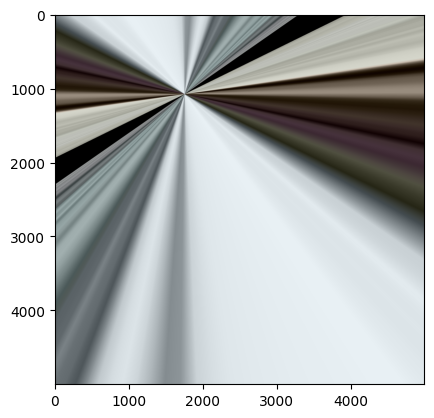

In [103]:
import matplotlib.pyplot as plt

H =  np.array(homographies['c10gt']['c11gt'])
im_uwu = cv2.warpPerspective(image, H, (5000, 5000))
plt.imshow(im_uwu)
plt.show()